## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames



# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")


# Success - Display the first record
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df=data.copy()
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df.shape

(45222, 14)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
education_level,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (5982, 14)


In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df.shape

(39240, 14)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted.

In [ ]:
# TODO: Total number of records
n_records = df.shape[0]
# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = df['income'].value_counts()['>50K']


# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k =df['income'].value_counts()['<=50K']


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k / n_records) * 100)

# Print the results

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))

print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))


Total number of records: 39240
Individuals making more than $50,000: 9975
Individuals making at most $50,000: 29265
Percentage of individuals making more than $50,000: 25%


** Featureset Exploration **

* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


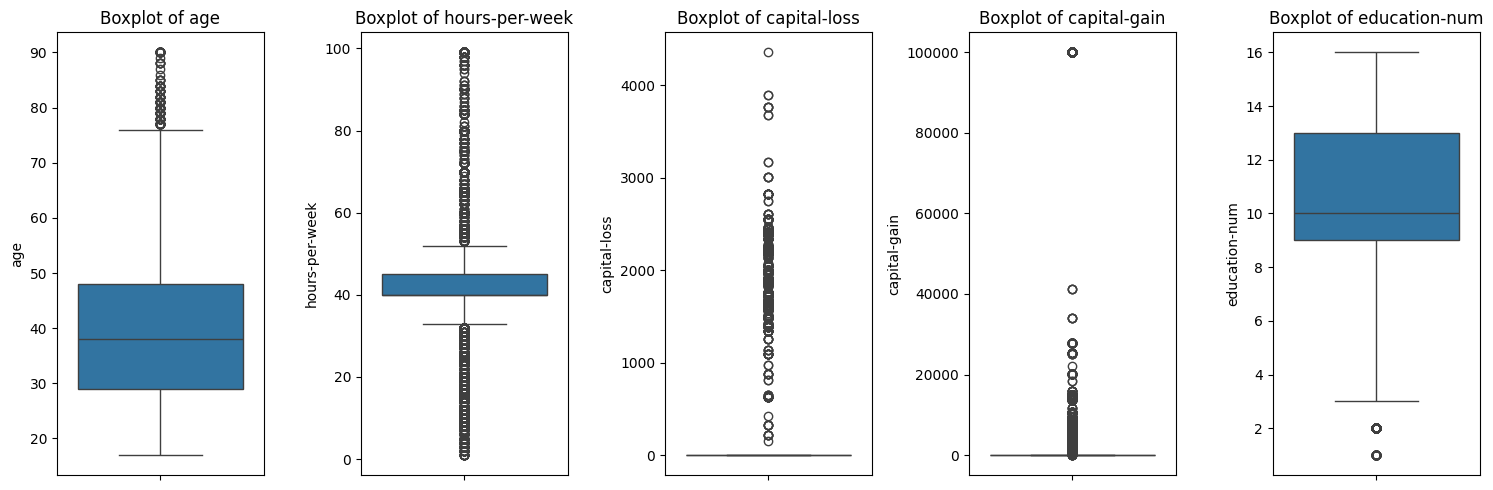

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for which you want boxplots
columns = ['age', 'hours-per-week', 'capital-loss','capital-gain','education-num'] # Add your column names here

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
print(df['capital-gain'].value_counts(normalize=True)*100)


capital-gain
0.0        90.438328
15024.0     1.238532
7688.0      0.970948
7298.0      0.879205
99999.0     0.575943
             ...    
22040.0     0.002548
1639.0      0.002548
2387.0      0.002548
7262.0      0.002548
1731.0      0.002548
Name: proportion, Length: 121, dtype: float64


In [ ]:
print(df['capital-loss'].value_counts(normalize=True)*100)

capital-loss
0.0       94.589704
1902.0     0.736493
1977.0     0.619266
1887.0     0.570846
2415.0     0.168196
            ...    
155.0      0.002548
419.0      0.002548
2080.0     0.002548
4356.0     0.002548
2163.0     0.002548
Name: proportion, Length: 97, dtype: float64


In [ ]:
# List of columns to apply outlier removal
columns = ['age', 'hours-per-week','education-num']  # Add the columns you want to process

# Loop through each column
for col in columns:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    # IQR calculated for the column
    iqr = percentile75 - percentile25

    # Calculating upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Removing outliers by clipping the values
    df[col] = np.clip(df[col], lower_limit, upper_limit)


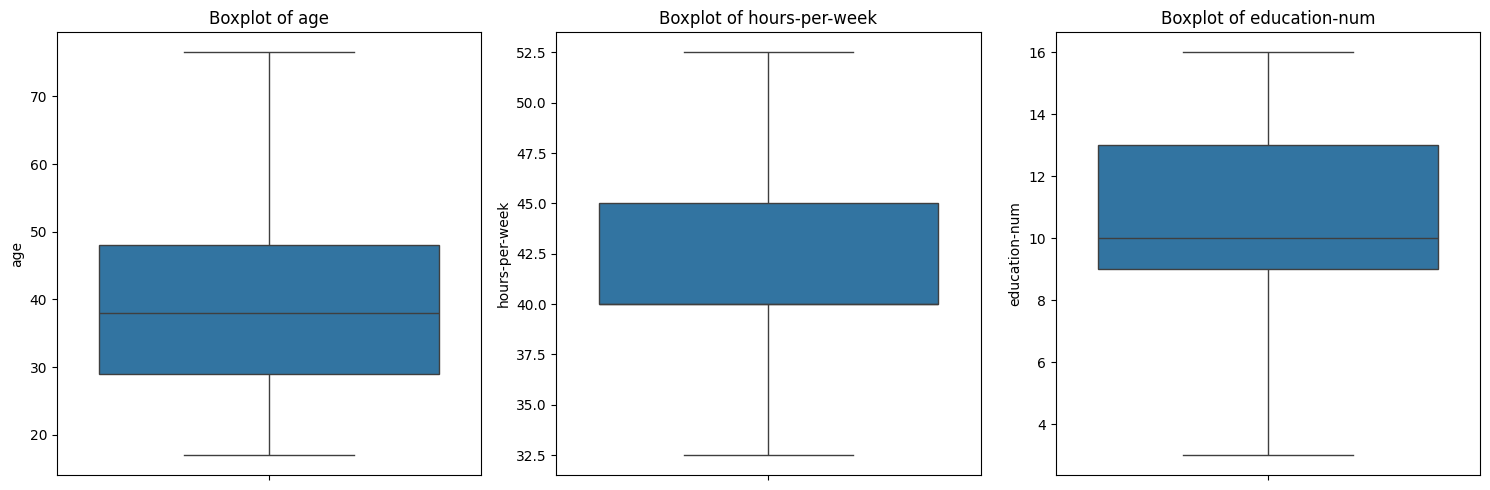

In [ ]:
# List of columns for which you want boxplots
columns = ['age', 'hours-per-week', 'education-num'] # Add your column names here

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
numeric = df.select_dtypes(include = ["int64" , "float64"])
numeric

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39.0,13.0,2174.0,0.0,40.0,0
1,50.0,13.0,0.0,0.0,32.5,0
2,38.0,9.0,0.0,0.0,40.0,0
3,53.0,7.0,0.0,0.0,40.0,0
4,28.0,13.0,0.0,0.0,40.0,0
...,...,...,...,...,...,...
45216,48.0,14.0,0.0,0.0,40.0,0
45217,33.0,13.0,0.0,0.0,40.0,0
45218,39.0,13.0,0.0,0.0,36.0,0
45220,44.0,13.0,5455.0,0.0,40.0,0


In [ ]:
numeric.skew()

,0
age,0.459565
education-num,-0.284381
capital-gain,11.045685
capital-loss,4.181972
hours-per-week,0.363545
income,1.129063


In [ ]:
numeric.corr()['income']

,income
age,0.216115
education-num,0.331189
capital-gain,0.231530
capital-loss,0.153143
hours-per-week,0.259702
income,1.000000


In [ ]:
columns = ['capital-gain', 'capital-loss']
df[columns] = df[columns].apply(lambda x: np.log1p(x))

In [ ]:
num_corr = numeric.corr()["income"].sort_values(ascending = False)
num_corr

,income
income,1.000000
education-num,0.331189
hours-per-week,0.259702
capital-gain,0.231530
age,0.216115
capital-loss,0.153143


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[numeric.columns] = scaler.fit_transform(df[numeric.columns])

df.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.369748,State-gov,Bachelors,0.769231,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.375,United-States,0.0
1,0.554622,Self-emp-not-inc,Bachelors,0.769231,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.000,United-States,0.0
2,0.352941,Private,HS-grad,0.461538,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.375,United-States,0.0
3,0.605042,Private,11th,0.307692,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.375,United-States,0.0
4,0.184874,Private,Bachelors,0.769231,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.375,Cuba,0.0
5,0.336134,Private,Masters,0.846154,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.375,United-States,0.0
6,0.537815,Private,9th,0.153846,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.000,Jamaica,0.0
7,0.588235,Self-emp-not-inc,HS-grad,0.461538,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.625,United-States,1.0
8,0.235294,Private,Masters,0.846154,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.875,United-States,1.0
9,0.420168,Private,Bachelors,0.769231,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.375,United-States,1.0


In [ ]:
new_df = pd.get_dummies(df , dtype='int')

In [ ]:
new_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.369748,0.769231,0.667492,0.0,0.375,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.554622,0.769231,0.000000,0.0,0.000,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.352941,0.461538,0.000000,0.0,0.375,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.605042,0.307692,0.000000,0.0,0.375,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.184874,0.769231,0.000000,0.0,0.375,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = new_df["income"]
X = new_df.drop(["income"] , axis = 1)

print(y)
X.head()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45216    0.0
45217    0.0
45218    0.0
45220    0.0
45221    1.0
Name: income, Length: 39240, dtype: float64


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.369748,0.769231,0.667492,0.0,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.554622,0.769231,0.000000,0.0,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.352941,0.461538,0.000000,0.0,0.375,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.605042,0.307692,0.000000,0.0,0.375,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.184874,0.769231,0.000000,0.0,0.375,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9755351681957186
The test accuracy is 0.8059378185524975


In [ ]:
# TODO: Train the model
model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=6,min_samples_split=5,random_state=42)
model.fit(X_train,y_train)
# TODO: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# TODO: Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8571292048929664
The test accuracy is 0.8563965341488278


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The training F1 Score is 0.6914724393111557
The testing F1 Score is 0.6908386382507612
The training accuracy is 0.8578937308868502
The test accuracy is 0.8576707441386341


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(learning_rate=0.001,n_estimators=100,
                                  estimator = DecisionTreeClassifier(max_depth=10,min_samples_leaf=4, min_samples_split=10),
                                  random_state=42)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    min_samples_leaf=4,
                                                    min_samples_split=10),
                   learning_rate=0.001, n_estimators=100, random_state=42)

In [ ]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.864328491335372
The test accuracy is 0.8611111111111112


In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Making predictions
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
clf =AdaBoostClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'learning_rate':[1,0.1,0.001,0.0001],'n_estimators':[50,100], 'estimator':[DecisionTreeClassifier(random_state=42)],'estimator__max_depth':[10],'estimator__min_samples_leaf':[4],'estimator__min_samples_split':[10]} # Changed 'base_estimator__' to 'estimator__'
cv_sets=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.8315748339194998
The testing F1 Score is 0.6955573725810847
The training accuracy is 0.9176223241590215
The test accuracy is 0.8576707441386341


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    min_samples_leaf=4,
                                                    min_samples_split=10,
                                                    random_state=42),
                   learning_rate=0.1, random_state=42)

In [ ]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Importing the necessary libraries
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

# Define classifier
clf = AdaBoostClassifier(random_state=42)

# Define the parameter space
param_space = {
    'learning_rate': [1, 0.1, 0.001, 0.0001],
    'n_estimators': [50, 100],
    'estimator': [DecisionTreeClassifier(random_state=42)],
    'estimator__max_depth': (2, 10),
    'estimator__min_samples_leaf': (2, 10),
    'estimator__min_samples_split': (2, 10)
}

# Cross-validation setup
cv_sets = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)

# Define the scoring object
scorer = make_scorer(f1_score)

# Perform Bayesian search on the classifier using 'scorer' as the scoring method
bayes_search = BayesSearchCV(estimator=clf,
                             search_spaces=param_space,
                             scoring=scorer,
                             cv=cv_sets,
                             n_iter=32,  # Number of iterations for Bayesian search
                             random_state=42)

# Fit the search object to the training data and find the optimal parameters
bayes_fit = bayes_search.fit(X_train, y_train)

# Get the best estimator
best_clf = bayes_fit.best_estimator_

# Fit the new model
best_clf.fit(X_train, y_train)

# Make predictions using the new model
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model
print('The training F1 Score is', f1_score(y_train, best_train_predictions))
print('The testing F1 Score is', f1_score(y_test, best_test_predictions))

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test, best_test_predictions)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model
print("Best Parameters:", bayes_fit.best_params_)


The training F1 Score is 0.7277452025586354
The testing F1 Score is 0.7228144989339019
The training accuracy is 0.8698394495412844
The test accuracy is 0.8674821610601428
Best Parameters: OrderedDict([('estimator', DecisionTreeClassifier(random_state=42)), ('estimator__max_depth', 2), ('estimator__min_samples_leaf', 4), ('estimator__min_samples_split', 10), ('learning_rate', 1), ('n_estimators', 97)])
